<h2>DATA 620 - Project 3</h2>
<h3>Name Gender Classifier</h3>

<h3>Team : Mohamed Thasleem, Kalikul Zaman and Jeyaraman Ramalingam</h3>

<h3>Assignment</h3>

Using any of the three classifiers described in chapter 6 of Natural Language Processing with Python, and any features you can think of, build the best name gender classifier you can.

Begin by splitting the Names Corpus into three subsets: 500 words for the test set, 500 words for the dev-test set, and the remaining 6900 words for the training set. Then, starting with the example name gender classifier, make incremental improvements. Use the dev-test set to check your progress. Once you are satisfied with your classifier, check its final performance on the test set.

How does the performance on the test set compare to the performance on the dev-test set? Is this what you'd expect?

<h3>Libraries</h3>

In [13]:
import nltk
import pandas as pd
import random
from nltk.corpus import names
from nltk.classify import apply_features
import collections
import nltk.metrics
from nltk.metrics import precision,recall,f_measure
import numpy as np
import matplotlib.pyplot as plt

<h3>Data Preperation</h3>

Import names data from NLTK library files males and females, adding them to make an single dataset and apply random shuffling to names

In [14]:
#set seed for recreation
random.seed(620)

#get data from NLTK library files
names = ([(name, 'male') for name in names.words('male.txt')] +
[(name, 'female') for name in names.words('female.txt')])

# and to make sure we are sampling across all the names
# we shuffle them so they aren't alphabetical
random.shuffle(names)

<h4>Sample Data</h4>

In [15]:
#list names
names[0:10]

[('Christie', 'female'),
 ('Tibold', 'male'),
 ('Chet', 'male'),
 ('Alyss', 'female'),
 ('Eunice', 'female'),
 ('Mehetabel', 'female'),
 ('Marj', 'female'),
 ('Adam', 'male'),
 ('Natka', 'female'),
 ('Sarene', 'female')]

<h4>Data Stats</h4>

In [16]:
print("Total count: " , len(names))

Total count:  7944


Splitting the dataset based on the below condition

500 words for the test set, 500 words for the dev-test set, and the remaining 6900 + words for the training set

In [17]:
test_set = names[:500]
print("test set: " , len(test_set))
devtest_set = names[500:1000] 
print("dev test set: " , len(devtest_set))
train_set = names[1000:]
print("train set: " , len(train_set))

test set:  500
dev test set:  500
train set:  6944


<h3>Feature Set - Gender</h3>

Setting up the feature set to predict the outpur variable, it is an individual measurable property or characteristic of a phenomenon being observed, In our case the deature will be different pattern/characteristics of the name

In [18]:
def gender_features(name):
    features = {}
    features["firstletter"] = name[0].lower()
    features["lastletter"] = name[-1].lower()
    features["suffix2"]= name[-2:].lower()
    features["preffix2"]= name[:2].lower()
    for letter in 'aeiou':
        features["count(%s)" % letter] = name.lower().count(letter)
        features["has(%s)" % letter] = (letter in name.lower())
    return features

In [19]:
featuresets = [(gender_features(n), g) for (n,g) in names]

In [20]:
train_set_fe = featuresets[1000:]
test_set_fe =featuresets[:500]
devtest_set_fe =featuresets[500:1000]

<h3>Naive Baiyer Classifier</h3>

Applying the Naive Baiyer Classifier to find out the accuracy of the prediction

In [21]:
classifier = nltk.NaiveBayesClassifier.train(train_set_fe)

<h4>Calculate Metrics: {Accuracy, Recall, Precision, F_Measure}</h4>

In [22]:
refsets = collections.defaultdict(set)
testsets = collections.defaultdict(set)
 
for i, (feats, label) in enumerate(train_set_fe):
    refsets[label].add(i)
    observed = classifier.classify(feats)
    testsets[observed].add(i)

accuracy_train = nltk.classify.accuracy(classifier, train_set_fe)
avg_precision_train = (precision(refsets['male'], testsets['male'])+precision(refsets['male'], testsets['female']))/2
avg_recall_train = (recall(refsets['male'], testsets['male'])+recall(refsets['male'], testsets['female']))/2
avg_f_measure_train = (f_measure(refsets['male'], testsets['male'])+f_measure(refsets['male'], testsets['female']))/2


refsets = collections.defaultdict(set)
testsets = collections.defaultdict(set)
 
for i, (feats, label) in enumerate(test_set_fe):
    refsets[label].add(i)
    observed = classifier.classify(feats)
    testsets[observed].add(i)

accuracy_test = nltk.classify.accuracy(classifier, test_set_fe)
avg_precision_test = (precision(refsets['male'], testsets['male'])+precision(refsets['male'], testsets['female']))/2
avg_recall_test = (recall(refsets['male'], testsets['male'])+recall(refsets['male'], testsets['female']))/2
avg_f_measure_test = (f_measure(refsets['male'], testsets['male'])+f_measure(refsets['male'], testsets['female']))/2


for i, (feats, label) in enumerate(devtest_set_fe):
    refsets[label].add(i)
    observed = classifier.classify(feats)
    testsets[observed].add(i)

accuracy_dev = nltk.classify.accuracy(classifier, devtest_set_fe)
avg_precision_dev = (precision(refsets['male'], testsets['male'])+precision(refsets['male'], testsets['female']))/2
avg_recall_dev = (recall(refsets['male'], testsets['male'])+recall(refsets['male'], testsets['female']))/2
avg_f_measure_dev = (f_measure(refsets['male'], testsets['male'])+f_measure(refsets['male'], testsets['female']))/2

accuracy_naive_final = [accuracy_train,accuracy_test,accuracy_dev]
precision_naive_final = [avg_precision_train,avg_precision_test,avg_precision_dev]
recall_naive_final = [avg_recall_train,avg_recall_test,avg_recall_dev]
f_measure_naive_final = [avg_f_measure_train,avg_f_measure_test,avg_f_measure_dev]

naive_final_train = [accuracy_train,avg_precision_train,avg_recall_train,avg_f_measure_train]
naive_final_test = [accuracy_test,avg_precision_test,avg_recall_test,avg_f_measure_test]
naive_final_dev = [accuracy_dev,avg_precision_dev,avg_recall_dev,avg_f_measure_dev]
naive_combined = {'Accuracy':accuracy_naive_final,'Precision':precision_naive_final,'Recall':recall_naive_final,'F_Measure':f_measure_naive_final}

df_naive = pd.DataFrame(naive_combined,index=['Train','Test','Dev'],columns=['Accuracy','Precision','Recall','F_Measure'])

<h4>Naive Baiyer features list</h4>

In [23]:
print("---------Naive Bayes Classifier Metrics---------")
print(df_naive)

# Show important features
classifier.show_most_informative_features(20)

---------Naive Bayes Classifier Metrics---------
       Accuracy  Precision    Recall  F_Measure
Train  0.810916   0.437817  0.500000   0.463358
Test   0.802000   0.419760  0.500000   0.454170
Dev    0.778000   0.622769  0.794014   0.695505
Most Informative Features
                 suffix2 = 'na'           female : male   =     93.8 : 1.0
                 suffix2 = 'la'           female : male   =     71.8 : 1.0
                 suffix2 = 'ia'           female : male   =     52.5 : 1.0
              lastletter = 'a'            female : male   =     34.6 : 1.0
                 suffix2 = 'sa'           female : male   =     32.6 : 1.0
                 suffix2 = 'rd'             male : female =     29.4 : 1.0
              lastletter = 'f'              male : female =     28.5 : 1.0
              lastletter = 'k'              male : female =     28.0 : 1.0
                 suffix2 = 'us'             male : female =     27.5 : 1.0
                 suffix2 = 'ra'           female : male   

<h4>Compare with dev test data for error rate - NB</h4>

In [24]:
# Check errors
errors = []
for (name, tag) in devtest_set:
    guess = classifier.classify(gender_features(name))
    if guess != tag:
        errors.append( (tag, guess, name) )

In [25]:
for (tag, guess, name) in sorted(errors): # doctest: +ELLIPSIS +NORMALIZE_WHITESPACE
    print('correct=%-8s guess=%-8s name=%-30s' % (tag, guess, name))

correct=female   guess=male     name=Aurore                        
correct=female   guess=male     name=Austin                        
correct=female   guess=male     name=Barbe                         
correct=female   guess=male     name=Barby                         
correct=female   guess=male     name=Bebe                          
correct=female   guess=male     name=Bird                          
correct=female   guess=male     name=Birgit                        
correct=female   guess=male     name=Bunnie                        
correct=female   guess=male     name=Cameo                         
correct=female   guess=male     name=Caron                         
correct=female   guess=male     name=Clemmy                        
correct=female   guess=male     name=Cloris                        
correct=female   guess=male     name=Coleen                        
correct=female   guess=male     name=Colleen                       
correct=female   guess=male     name=Corliss    

<h4>Result of Unmatched Error Count - NB</h4>

In [26]:
naive_errors = len(errors)
print("Error count: ", naive_errors)

Error count:  111


<h3>Decision Tree Classifier</h3>

Applying the decision tree classifier to find the accuracy

In [27]:
classifier_tree = nltk.DecisionTreeClassifier.train(train_set_fe)

<h4>Calculate Metrics</h4>

In [28]:
refsets = collections.defaultdict(set)
testsets = collections.defaultdict(set)
 
for i, (feats, label) in enumerate(train_set_fe):
    refsets[label].add(i)
    observed = classifier_tree.classify(feats)
    testsets[observed].add(i)

accuracy_train_dt = nltk.classify.accuracy(classifier_tree, train_set_fe)
avg_precision_train_dt = (precision(refsets['male'], testsets['male'])+precision(refsets['male'], testsets['female']))/2
avg_recall_train_dt = (recall(refsets['male'], testsets['male'])+recall(refsets['male'], testsets['female']))/2
avg_f_measure_train_dt = (f_measure(refsets['male'], testsets['male'])+f_measure(refsets['male'], testsets['female']))/2


refsets = collections.defaultdict(set)
testsets = collections.defaultdict(set)
 
for i, (feats, label) in enumerate(test_set_fe):
    refsets[label].add(i)
    observed = classifier_tree.classify(feats)
    testsets[observed].add(i)

accuracy_test_dt = nltk.classify.accuracy(classifier_tree, test_set_fe)
avg_precision_test_dt = (precision(refsets['male'], testsets['male'])+precision(refsets['male'], testsets['female']))/2
avg_recall_test_dt = (recall(refsets['male'], testsets['male'])+recall(refsets['male'], testsets['female']))/2
avg_f_measure_test_dt = (f_measure(refsets['male'], testsets['male'])+f_measure(refsets['male'], testsets['female']))/2


for i, (feats, label) in enumerate(devtest_set_fe):
    refsets[label].add(i)
    observed = classifier_tree.classify(feats)
    testsets[observed].add(i)

accuracy_dev_dt = nltk.classify.accuracy(classifier, devtest_set_fe)
avg_precision_dev_dt = (precision(refsets['male'], testsets['male'])+precision(refsets['male'], testsets['female']))/2
avg_recall_dev_dt = (recall(refsets['male'], testsets['male'])+recall(refsets['male'], testsets['female']))/2
avg_f_measure_dev_dt = (f_measure(refsets['male'], testsets['male'])+f_measure(refsets['male'], testsets['female']))/2

accuracy_dt_final = [accuracy_train_dt,accuracy_test_dt,accuracy_dev_dt]
precision_dt_final = [avg_precision_train_dt,avg_precision_test_dt,avg_precision_dev_dt]
recall_dt_final = [avg_recall_train_dt,avg_recall_test_dt,avg_recall_dev_dt]
f_measure_dt_final = [avg_f_measure_train_dt,avg_f_measure_test_dt,avg_f_measure_dev_dt]

dt_final_train = [accuracy_train_dt,avg_precision_train_dt,avg_recall_train_dt,avg_f_measure_train_dt]
dt_final_test = [accuracy_test_dt,avg_precision_test_dt,avg_recall_test_dt,avg_f_measure_test_dt]
dt_final_dev = [accuracy_dev_dt,avg_precision_dev_dt,avg_recall_dev_dt,avg_f_measure_dev_dt]
dt_combined = {'Accuracy':accuracy_dt_final,'Precision':precision_dt_final,'Recall':recall_dt_final,'F_Measure':f_measure_dt_final}
df_dt = pd.DataFrame(dt_combined,index=['Train','Test','Dev'],columns=['Accuracy','Precision','Recall','F_Measure'])

print("---------Decision Tree Classifier Metrics---------")
print(df_dt)

---------Decision Tree Classifier Metrics---------
       Accuracy  Precision    Recall  F_Measure
Train  0.934476   0.497815  0.500000   0.495570
Test   0.740000   0.407371  0.500000   0.446304
Dev    0.778000   0.616338  0.783451   0.686486


<h4>Compare with dev test data for error rate - DT</h4>

In [29]:
errors2 = []
for (name, tag) in devtest_set:
    guess = classifier_tree.classify(gender_features(name))
    if guess != tag:
        errors2.append( (tag, guess, name) )

In [30]:
for (tag, guess, name) in sorted(errors): # doctest: +ELLIPSIS +NORMALIZE_WHITESPACE
    print('correct=%-8s guess=%-8s name=%-30s' % (tag, guess, name))

correct=female   guess=male     name=Aurore                        
correct=female   guess=male     name=Austin                        
correct=female   guess=male     name=Barbe                         
correct=female   guess=male     name=Barby                         
correct=female   guess=male     name=Bebe                          
correct=female   guess=male     name=Bird                          
correct=female   guess=male     name=Birgit                        
correct=female   guess=male     name=Bunnie                        
correct=female   guess=male     name=Cameo                         
correct=female   guess=male     name=Caron                         
correct=female   guess=male     name=Clemmy                        
correct=female   guess=male     name=Cloris                        
correct=female   guess=male     name=Coleen                        
correct=female   guess=male     name=Colleen                       
correct=female   guess=male     name=Corliss    

<h4>Result of Unmatched Error Count - DT</h4>

In [31]:
dt_errors = len(errors2)
print("Error count: ", dt_errors)

Error count:  132


<h3>Classifier Comparison Charts</h3>

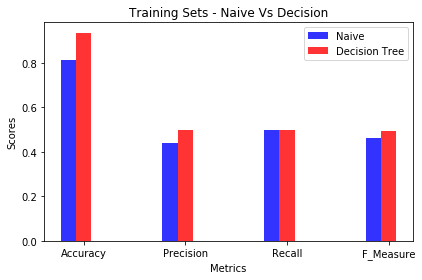

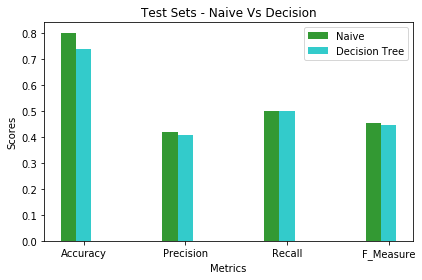

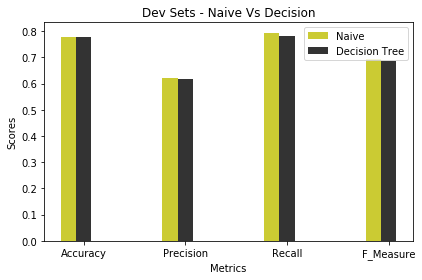

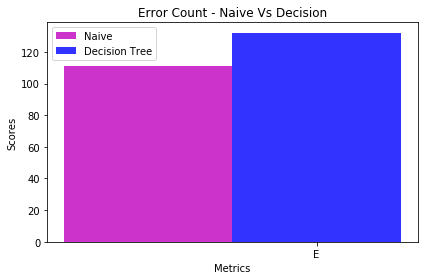

In [32]:
n_groups = 4
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8

rects1 = plt.bar(index, naive_final_train, bar_width,
alpha=opacity,
color='b',
label='Naive')

rects2 = plt.bar(index + bar_width, dt_final_train, bar_width,
alpha=opacity,
color='r',
label='Decision Tree')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Training Sets - Naive Vs Decision')
plt.xticks(index + bar_width, ('Accuracy', 'Precision', 'Recall', 'F_Measure'))
plt.legend()

plt.tight_layout()
plt.show()

n_groups = 4
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8

rects1 = plt.bar(index, naive_final_test, bar_width,
alpha=opacity,
color='g',
label='Naive')

rects2 = plt.bar(index + bar_width, dt_final_test, bar_width,
alpha=opacity,
color='c',
label='Decision Tree')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Test Sets - Naive Vs Decision')
plt.xticks(index + bar_width, ('Accuracy', 'Precision', 'Recall', 'F_Measure'))
plt.legend()

plt.tight_layout()
plt.show()

n_groups = 4
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8

rects1 = plt.bar(index, naive_final_dev, bar_width,
alpha=opacity,
color='y',
label='Naive')

rects2 = plt.bar(index + bar_width, dt_final_dev, bar_width,
alpha=opacity,
color='k',
label='Decision Tree')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Dev Sets - Naive Vs Decision')
plt.xticks(index + bar_width, ('Accuracy', 'Precision', 'Recall', 'F_Measure'))
plt.legend()

plt.tight_layout()
plt.show()

n_groups = 1
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.05
opacity = 0.8

rects1 = plt.bar(index, naive_errors, bar_width,
alpha=opacity,
color='m',
label='Naive')

rects2 = plt.bar(index + bar_width, dt_errors, bar_width,
alpha=opacity,
color='b',
label='Decision Tree')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Error Count - Naive Vs Decision')
plt.xticks(index + bar_width, ('Error Count'))
plt.legend()

plt.tight_layout()
plt.show()


<h3>Conclusion</h3>

<h4>How does the performance on the test set compare to the performance on the dev-test set? Is this what you'd expect?</h4>




The training accuracy of Decision Tree model better than Naive Bayer, however it resulted much unmatched error count count than Naive Bayer model, on average considering the accuracy of the three different data sets and matched prediction, Naive Baiyer outperfomed Decision Tree model